In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from io import StringIO

In [2]:
plt.rcParams['text.usetex'] = True

In [3]:
data15 = """
Year	Quarters	Markov order	Layers	Physical nodes	State nodes	Links	State entropy rate	Physical entropy rate	Modules	Module perplexity	Overlap	Seconds
2011	1+2+3+4	1	1	438	438	9681	5.11	5.11	3	1	1	0.012
2011	1+2,3+4	1	2	438	861	34384	5.46	5.09	8	1.15	1	0.084
2011	1,2,3,4	1	4	438	1683	121749	5.78	5.05	10	1.23	1	0.29
2011	1+2+3+4	2	1	438	9681	181326	3.79	3.79	120	10.97	3.46	1.9
2011	1+2,3+4	2	2	438	17203	614472	4.11	3.75	209	13.51	3.6	6.7
2011	1,2,3,4	2	4	438	30489	2014650	4.32	3.69	218	12.28	3.71	27
2011	1+2+3+4	3	1	432	180900	465456	1.11	1.11	3759	9.13	3.95	264
2011	1+2,3+4	3	2	432	307904	1406605	1.1	0.92	6293	17.64	5.81	1057
2011	1,2,3,4	3	4	432	507054	4112089	1.16	0.86	6195	16.22	4.81	2607
"""

In [4]:
d15 = pd.read_csv(StringIO(data15), sep='\t')

In [5]:
d15.head()

,Year,Quarters,Markov order,Layers,Physical nodes,State nodes,Links,State entropy rate,Physical entropy rate,Modules,Module perplexity,Overlap,Seconds
0,2011,1+2+3+4,1,1,438,438,9681,5.11,5.11,3,1.00,1.00,0.012
1,2011,"1+2,3+4",1,2,438,861,34384,5.46,5.09,8,1.15,1.00,0.084
2,2011,"1,2,3,4",1,4,438,1683,121749,5.78,5.05,10,1.23,1.00,0.290
3,2011,1+2+3+4,2,1,438,9681,181326,3.79,3.79,120,10.97,3.46,1.900
4,2011,"1+2,3+4",2,2,438,17203,614472,4.11,3.75,209,13.51,3.60,6.700


In [6]:
d15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 13 columns):
Year                     9 non-null int64
Quarters                 9 non-null object
Markov order             9 non-null int64
Layers                   9 non-null int64
Physical nodes           9 non-null int64
State nodes              9 non-null int64
Links                    9 non-null int64
State entropy rate       9 non-null float64
Physical entropy rate    9 non-null float64
Modules                  9 non-null int64
Module perplexity        9 non-null float64
Overlap                  9 non-null float64
Seconds                  9 non-null float64
dtypes: float64(5), int64(7), object(1)
memory usage: 1016.0+ bytes


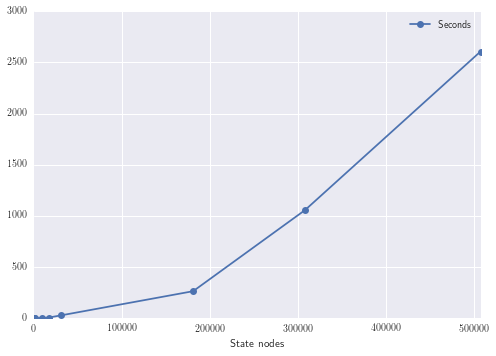

In [7]:
d15.plot(x='State nodes', y='Seconds', style='o-');

In [8]:
NS = d15['State nodes']
NL = d15['Links']

In [9]:
NL

0       9681
1      34384
2     121749
3     181326
4     614472
5    2014650
6     465456
7    1406605
8    4112089
Name: Links, dtype: int64

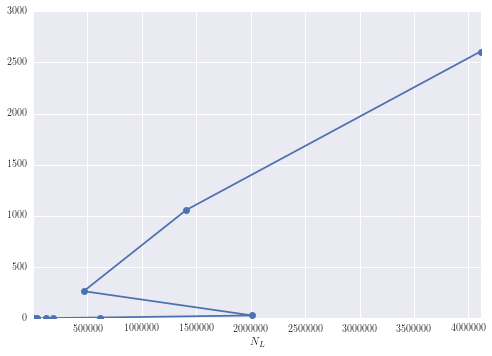

In [10]:
pd.Series(d15['Seconds'].values, index=NL.values).rename_axis('$N_L$').plot(style='o-');

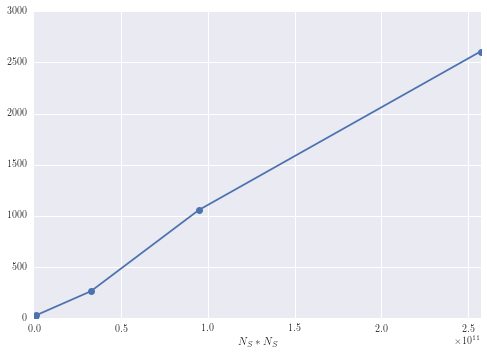

In [11]:
pd.Series(d15['Seconds'].values, index=(NS*NS).values).rename_axis('$N_S*N_S$').plot(style='o-');

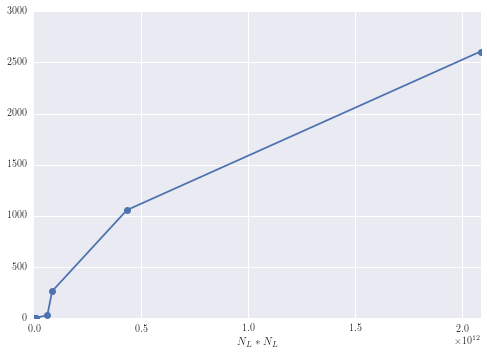

In [12]:
pd.Series(d15['Seconds'].values, index=(NS*NL).values).rename_axis('$N_L*N_L$').plot(style='o-');

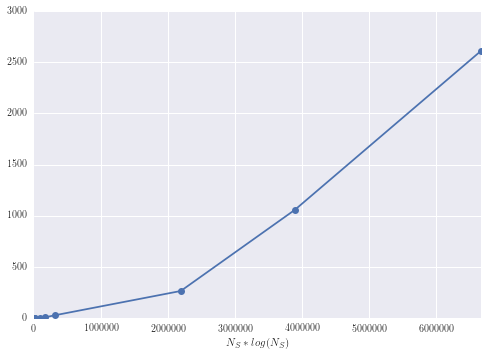

In [13]:
pd.Series(d15['Seconds'].values, index=(NS*np.log(NS)).values).rename_axis('$N_S*log(N_S)$').plot(style='o-');

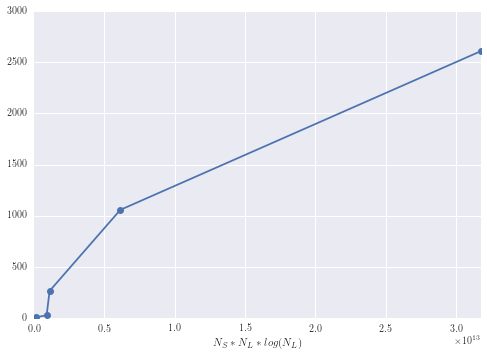

In [14]:
pd.Series(d15['Seconds'].values, index=(NS*NL*np.log(NL)).values).rename_axis('$N_S*N_L*log(N_L)$').plot(style='o-');

## Restrict to order 1 and 2

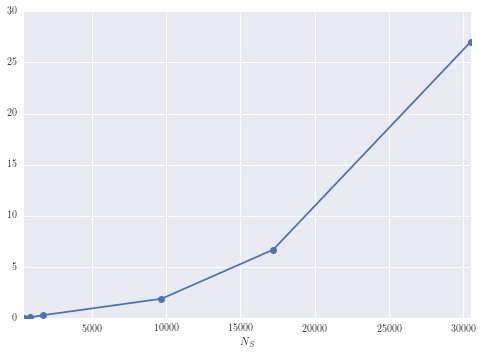

In [15]:
pd.Series(d15['Seconds'].values[0:6], index=(NS[0:6]).values).rename_axis('$N_S$').plot(style='o-');

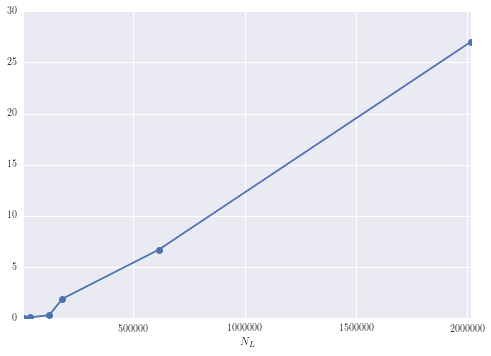

In [16]:
pd.Series(d15['Seconds'].values[0:6], index=(NL[0:6]).values).rename_axis('$N_L$').plot(style='o-');

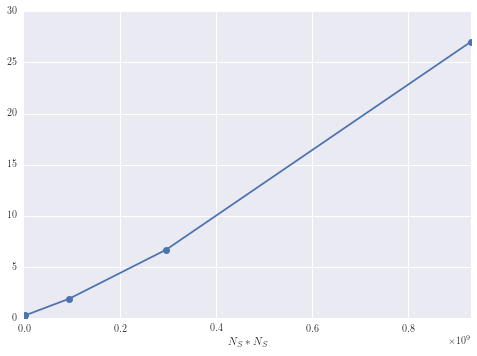

In [17]:
pd.Series(d15['Seconds'].values[0:6], index=(NS[0:6]*NS[0:6]).values).rename_axis('$N_S*N_S$').plot(style='o-');

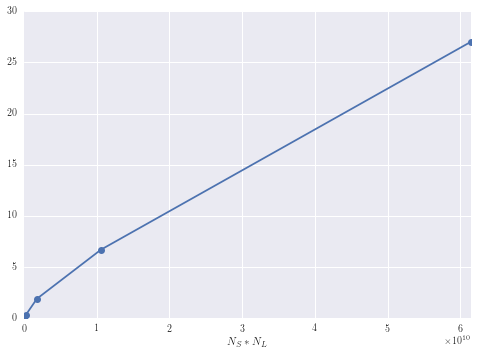

In [18]:
pd.Series(d15['Seconds'].values[0:6], index=(NS[0:6]*NL[0:6]).values).rename_axis('$N_S*N_L$').plot(style='o-');